In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [2]:
movies = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies = movies.merge(credits, left_on = 'id', right_on = 'movie_id')

In [3]:
movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ...  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                    title_x vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   
2                                   Spectre          6.3       4466   206647   
3                     The Dark Knight Rises          7.6       9106    49026   
4                               John Carter          6.1       2124    49529   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce W

In [4]:
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [5]:
movies.tail()

budget                                             genres  \
4798  220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799    9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800       0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801       0                                                 []   
4802       0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                 original_title  \
4798                El Mariachi   
4799                  Newlyweds   
4800  Signed, Sealed, Delivered   
4801           Shanghai Calling   
4802          My Date with Drew   

                                               overview  popularity  \
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ...    1.929883   

                                   production_companies  ...  \
4798           [{"name": "Columbia Pictures", "id": 5}]  ...   
4799                                                 []  ...   
4800  [{"name": "Front Street Pictures", "id": 3958}...  ...   
4801                                                 []  ...   
4802  [{"name": "rusty bear entertainment", "id": 87...  ...   

                                   spoken_languages    status  \
4798  [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]  Released   
4799                                             []  Released   
4800       [{"iso_639_1": "en", "name": "English"}]  Released   
4801       [{"iso_639_1": "en", "name": "English"}]  Released   
4802       [{"iso_639_1": "en", "name": "English"}]  Released   

                                                tagline  \
4798  He didn't come looking for trouble, but troubl...   
4799  A newlywed couple's honeymoon is upended by th...   
4800                                                NaN   
4801                           A New Yorker in Shanghai   
4802                                                NaN   

                        title_x vote_average vote_count movie_id  \
4798                El Mariachi          6.6        238     9367   
4799                  Newlyweds          5.9          5    72766   
4800  Signed, Sealed, Delivered          7.0          6   231617   
4801           Shanghai Calling          5.7          7   126186   
4802          My Date with Drew          6.3         16    25975   

                        title_y  \
4798                El Mariachi   
4799                  Newlyweds   
4800  Signed, Sealed, Delivered   
4801           Shanghai Calling   
4802          My Date with Drew   

                                                   cast  \
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi.

In [6]:
credits.tail()

movie_id                      title  \
4798      9367                El Mariachi   
4799     72766                  Newlyweds   
4800    231617  Signed, Sealed, Delivered   
4801    126186           Shanghai Calling   
4802     25975          My Date with Drew   

                                                   cast  \
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
missing_data = movies.isnull().sum()
missing_data[missing_data > 0]

homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64

In [9]:
movies.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count       movie_id  
count   4803.000000   4803.000000    4803.000000  
mean       6.092172    690.217989   57165.484281  
std        1.194612   1234.585891   88694.614033  
min        0.000000      0.000000       5.000000  
25%        5.600000     54.000000    9014.500000  
50%        6.200000    235.000000   14629.000000  
75%        6.800000    737.000000   58610.500000  
max       10.000000  13752.000000  459488.000000

In [10]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
movies['release_year'] = movies['release_date'].dt.year

In [11]:
movies['budget'] = pd.to_numeric(movies['budget'], errors = 'coerce').fillna(0).astype(int)
movies['revenue'] = pd.to_numeric(movies['revenue'], errors = 'coerce').fillna(0).astype(int)
movies['runtime'].fillna(movies['runtime'].median())
movies = movies.drop_duplicates(subset = 'id')

In [12]:
import ast

def extract_names(entry): 
    if pd.isna(entry): 
        return []
    try:
        items = ast.literal_eval(entry)
        names = []
        
        for item in items:
            if isinstance(item, dict) and 'name' in item:
                names.append(item['name'])

        return names
    except Exception:
        return []
    
movies['genre_list'] = movies['genres'].apply(extract_names) 
movies['production_companies_list'] = movies['production_companies'].apply(extract_names) 

def parse_people(entry): 
    if pd.isna(entry): 
        return [] 
    
    try: 
        people = ast.literal_eval(entry) 
        return people
    
    except Exception: 
        return [] 

movies['cast_list'] = movies['cast'].apply(parse_people) 
movies['crew_list'] = movies['crew'].apply(parse_people) 

def get_director(crew_list): 
    for member in crew_list:
        if member.get('job') == 'Director': 
            return member.get('name') 
            
    return 'Unknown' 
    
movies['director'] = movies['crew_list'].apply(get_director)

movies = movies.drop(columns = ['cast', 'crew'])
movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... vote_average  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...          7.2   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...          6.9   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...          6.3   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...          7.6   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...          6.1   

  vote_count  movie_id                                   title_y release_year  \
0      11800     19995                                    Avatar       2009.0   
1       4500       285  Pirates of the Caribbean: At World's End       2007.0   
2       4466    206647                                   Spectre       2015.0   
3       9106     49026                     The Dark Knight Rises       2012.0   
4       2124     49529                               John Carter       2012.0   

                                      genre_list  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                           production_companies_list  \
0  [Ingenious Film Partners, Twentieth Century Fo...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...   
2                   [Columbia Pictures, Danjaq, B24]   
3  [Legendary Pictures, Warner Bros., DC Entertai...   
4                             [Walt Disney Pictures]   

                                           cast_list  \
0  [{'cast_id': 242, 'character': 'Jake Sully', '...   
1  [{'cast_id': 4, 'character': 'Captain Jack Spa...   
2  [{'cast_id': 1, 'character': 'James Bond', 'cr...   
3  [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...   
4  [{'cast_id': 5, 'character': 'John Carter', 'c...   

                                           crew_list           director  
0  [{'credit_id': '52fe48009251416c750aca23', 'de...      James Cameron  
1  [{'credit_id': '52fe4232c3a36847f800b579'

In [13]:
movies['profit'] = movies['revenue'] - movies['budget']
movies['return_of_investment'] = np.where(movies['budget'] > 0, 
                                         (movies['profit'] / movies['budget']) * 100, 0)

movies['number_of_genres'] = movies['genre_list'].apply(len)

movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ...  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   

                                    title_y release_year  \
0                                    Avatar       2009.0   
1  Pirates of the Caribbean: At World's End       2007.0   
2                                   Spectre       2015.0   
3                     The Dark Knight Rises       2012.0   
4                               John Carter       2012.0   

                                      genre_list  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                           production_companies_list  \
0  [Ingenious Film Partners, Twentieth Century Fo...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...   
2                   [Columbia Pictures, Danjaq, B24]   
3  [Legendary Pictures, Warner Bros., DC Entertai...   
4                             [Walt Disney Pictures]   

                                           cast_list  \
0  [{'cast_id': 242, 'character': 'Jake Sully', '...   
1  [{'cast_id': 4, 'character': 'Captain Jack Spa...   
2  [{'cast_id': 1, 'character': 'James Bond', 'cr...   
3  [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...   
4  [{'cast_id': 5, 'character': 'John Carter', 'c...   

                                           crew_list           director  \
0  [{'credit_id': '52fe48009251416c750aca23', 'de...      James Cameron   
1  [{'credit_id': '52fe4232c3a36847f800b579', 'de...     Gore Verbinski   
2  [{'credit_id': '54805967c3a36829b5002c41', 'de...         Sam Mendes   
3  [{'credit_id': '52fe4781c3a36847f81398c3', 'de...  Christopher Nolan   
4  [{'credit_id': '52

In [14]:
def budget(x):
    if x == 0:
        return None
    elif x < 10000000:
        return 'Low'
    elif x < 100000000:
        return 'Medium'
    else:
        return 'High'

movies['budget_category'] = movies['budget'].apply(budget)
movies

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ... 

In [15]:
revenue_by_genre = movies.explode('genre_list').groupby('genre_list')['revenue'].mean()
top_10_genres = revenue_by_genre.sort_values(ascending = False).head(10)
top_10_genres

genre_list
Animation          2.256930e+08
Adventure          2.086602e+08
Fantasy            1.933542e+08
Family             1.623455e+08
Science Fiction    1.524565e+08
Action             1.412131e+08
War                8.415587e+07
Thriller           8.104429e+07
Mystery            7.830093e+07
Comedy             7.128950e+07
Name: revenue, dtype: float64

In [21]:
top_10_directors = movies.groupby('director')['revenue'].mean().sort_values(ascending = False).head(10)
top_10_directors

director
Chris Buck          1.274219e+09
Kyle Balda          1.156731e+09
Lee Unkrich         1.066970e+09
Joss Whedon         9.879437e+08
Chris Renaud        8.759583e+08
James Cameron       8.405099e+08
Roger Allers        7.882418e+08
Tim Miller          7.831130e+08
Colin Trevorrow     7.587683e+08
Robert Stromberg    7.585398e+08
Name: revenue, dtype: float64

In [16]:
return_of_investment_by_budget = movies.groupby('budget_category')['return_of_investment'].mean()
return_of_investment_by_budget

budget_category
High         196.966938
Low       941937.694652
Medium       177.312696
Name: return_of_investment, dtype: float64

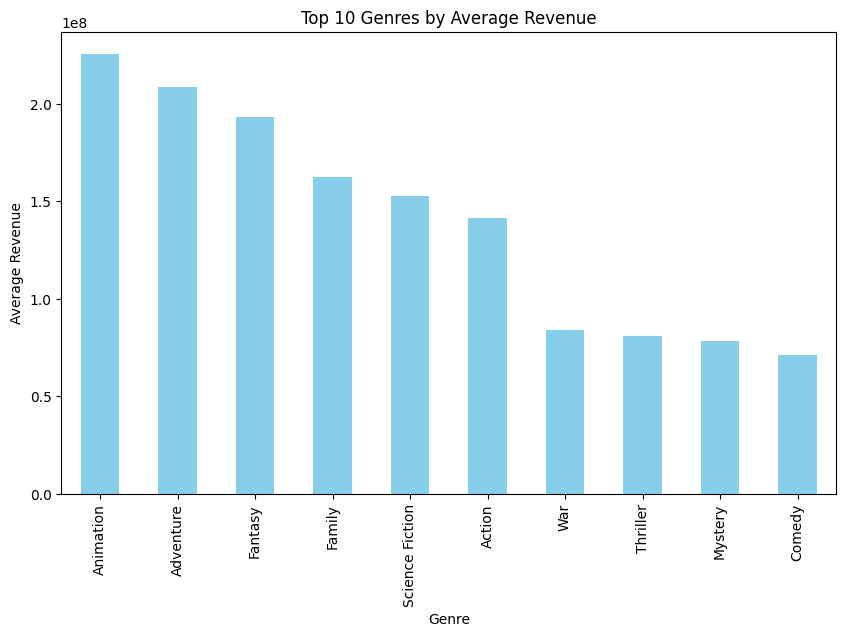

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
top_10_genres.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Genres by Average Revenue')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.show()

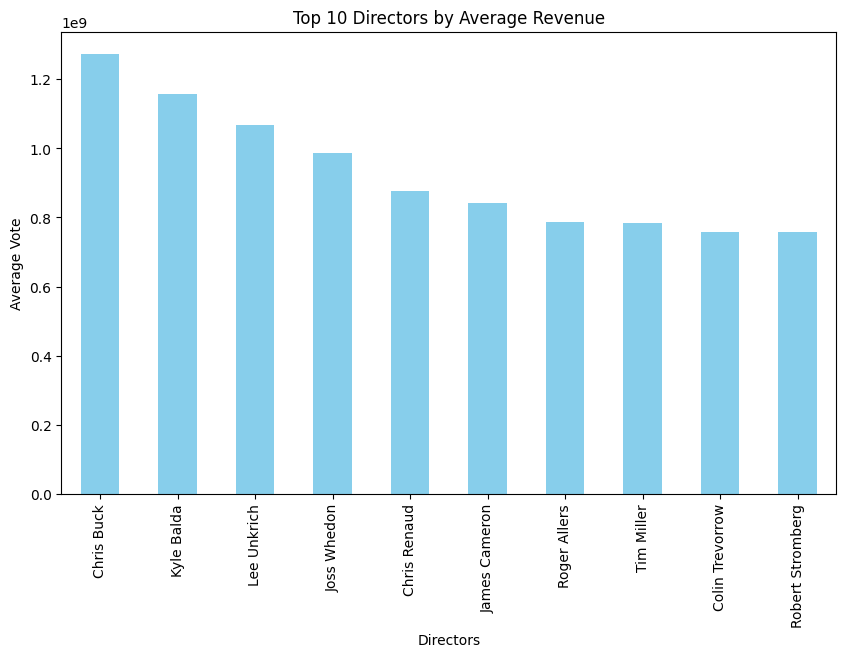

In [27]:
plt.figure(figsize = (10, 6))
top_10_directors.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Directors by Average Revenue')
plt.xlabel('Directors')
plt.ylabel('Average Vote')
plt.show()

In [19]:
import plotly.express as px

fig = px.line(x = return_of_investment_by_budget.index, y = return_of_investment_by_budget.values,
              title = 'Return of Investment by Budget',
              labels = {'x': 'Budget', 'y': 'Return of Investment'})
fig.show()

Genres like Animation, adventure, and fantasy have the highest average revenue, suggesting they perform well at the box office. Movies with a lower budget show a better average return on investment than higher-budget films. Bigger budgets don't guarantee bigger profits, and a lower budget can be more efficient and profitable. The top 10 directors seem to be mostly lesser-known. It's not always the most well-known or successful directors, but they may have maintained consistent quality in their filmography. Some movies have '0' for budget and/or revenue, so some of the data may be missing. By cleaning and analyzing the TMDB 5000 Movie Dataset, I find that genre, budget, and certain production choices can have an impact on a movie's success.